In [150]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import keras

In [151]:
np.random.seed(42)

In [152]:
import pandas as pd
dataset = pd.read_csv("./heart-disease/heart.csv")
dataset.shape

(303, 14)

In [153]:
X, y = dataset.iloc[:, :-1], dataset.loc[:, 'target']

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=86)


In [155]:
#y_train = np_utils.to_categorical(y_train, 2)
#y_test = np_utils.to_categorical(y_test, 2)

In [156]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [157]:
model = Sequential()

In [158]:
model.add(Dense(25, input_dim=13, kernel_initializer='normal', activation='relu'))

In [159]:
model.add(Dense(1, input_dim=25, kernel_initializer='normal', activation='relu'))

In [160]:
model.add(Dense(1, kernel_initializer='normal', activation='softmax'))

In [161]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [162]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 25)                350       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 26        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 2         
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


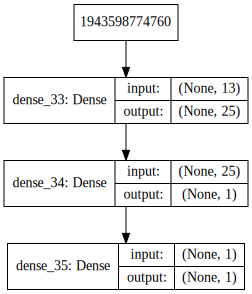

In [163]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [164]:
from keras.callbacks import EarlyStopping  
early_stopping = EarlyStopping(monitor='loss')

In [165]:
from keras.callbacks import TensorBoard  
tensorboard = TensorBoard(log_dir='../logs/', write_graph=True)

In [166]:
%%time
model.fit(X_train_scaled, y_train, batch_size=200, epochs=100, validation_split=0.2, callbacks=[early_stopping, tensorboard], verbose=2);

Train on 193 samples, validate on 49 samples
Epoch 1/100
 - 0s - loss: 7.0213 - acc: 0.5596 - val_loss: 6.8325 - val_acc: 0.5714
Epoch 2/100
 - 0s - loss: 7.0213 - acc: 0.5596 - val_loss: 6.8325 - val_acc: 0.5714
Wall time: 1.38 s


In [167]:
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Доля верных ответов на тестовых данных: %.2f%%" % (scores[1]*100))

Доля верных ответов на тестовых данных: 47.54%
